In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
xs = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0]).reshape(-1,1)
y_and = np.array([0,0,0,1]).reshape(-1,1)
y_or = np.array([0,1,1,1]).reshape(-1,1)
y_nand = np.array([1,1,1,0]).reshape(-1,1)
print(xs.shape)
print(y_and.shape)

(4, 2)
(4, 1)


[[0.]
 [1.]
 [1.]
 [1.]]


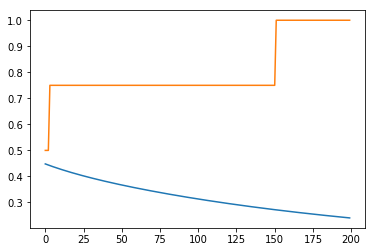

In [0]:
#-------------------OR gate---------------------------------------#

lr = 0.1
epoch = 200

loss_hist = []
acc_hist = []

x = tf.placeholder(dtype = tf.float32, shape = (None,2), name = 'x')
y = tf.placeholder(dtype = tf.float32, shape = (None,1), name = 'y')

w = tf.Variable(tf.random_normal(shape = [2,1]), dtype = tf.float32, name = 'w')
b = tf.Variable(tf.random_normal(shape = [1]), dtype = tf.float32,  name = 'b')

logit = tf.matmul(x,w) + b
pred_or = tf.nn.sigmoid(logit)

loss = -tf.reduce_mean(y*tf.log(pred_or+1e-8) + (1-y)*tf.log(1-pred_or+1e-8))
train_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)

acc = tf.reduce_mean(tf.cast(tf.equal(tf.round(pred_or),y),dtype = tf.float32, name = 'acc'))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(epoch):
  _,loss_, acc_ = sess.run([train_op, loss, acc], feed_dict = {x  : xs , y : y_or})
  loss_hist.append(loss_)
  acc_hist.append(acc_)

  
plt.plot(loss_hist)
plt.plot(acc_hist)


pred_or = sess.run(pred_or, feed_dict = {x : xs, y : y_or})
print(np.round(pred_or))

[[1.]
 [1.]
 [1.]
 [0.]]


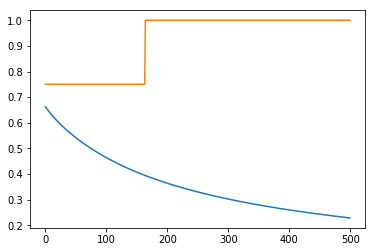

In [0]:
#-------------------NAND gate---------------------------------------#

lr = 0.1
epoch = 500

loss_hist = []
acc_hist = []

x = tf.placeholder(dtype = tf.float32, shape = (None,2), name = 'x')
y = tf.placeholder(dtype = tf.float32, shape = (None,1), name = 'y')

w = tf.Variable(tf.random_normal(shape = [2,1]), dtype = tf.float32, name = 'w')
b = tf.Variable(tf.random_normal(shape = [1]), dtype = tf.float32,  name = 'b')

logit = tf.matmul(x,w) + b
pred_nand = tf.nn.sigmoid(logit)

loss = -tf.reduce_mean(y*tf.log(pred_nand+1e-8) + (1-y)*tf.log(1-pred_nand+1e-8))
train_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)

acc = tf.reduce_mean(tf.cast(tf.equal(tf.round(pred_nand),y),dtype = tf.float32, name = 'acc'))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(epoch):
  _,loss_, acc_ = sess.run([train_op, loss, acc], feed_dict = {x  : xs , y : y_nand})
  loss_hist.append(loss_)
  acc_hist.append(acc_)
  
  
plt.plot(loss_hist)
plt.plot(acc_hist)



pred_nand = sess.run(pred_nand, feed_dict = {x : xs, y : y_nand})
print(np.round(pred_nand))

In [0]:
xs_new = np.round(np.concatenate([pred_or,pred_nand],axis = 1))
print(xs_new)

[[0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]]


[[0.]
 [1.]
 [1.]
 [0.]]


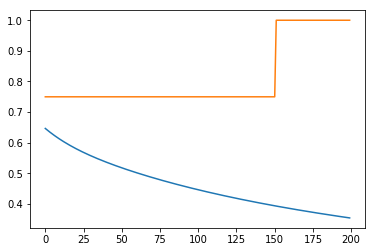

In [0]:
tf.reset_default_graph()

#---------------------And Gate------------------------------------#

lr = 0.1
epoch = 200

loss_hist = []
acc_hist = []

x = tf.placeholder(dtype = tf.float32, shape = (None,2), name = 'x')
y = tf.placeholder(dtype = tf.float32, shape = (None,1), name = 'y')

w = tf.Variable(tf.random_normal(shape = [2,1]), dtype = tf.float32, name = 'w')
b = tf.Variable(tf.random_normal(shape = [1]), dtype = tf.float32,  name = 'b')

logit = tf.matmul(x,w) + b
pred_and = tf.nn.sigmoid(logit)

loss = -tf.reduce_mean(y*tf.log(pred_and+1e-8) + (1-y)*tf.log(1-pred_and+1e-8))
train_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)

acc = tf.reduce_mean(tf.cast(tf.equal(tf.round(pred_and),y),dtype = tf.float32, name = 'acc'))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(epoch):
  _,loss_, acc_ = sess.run([train_op, loss, acc], feed_dict = {x  : xs , y : y_and})
  loss_hist.append(loss_)
  acc_hist.append(acc_)
  
  
plt.plot(loss_hist)
plt.plot(acc_hist)


In [0]:
#-----------------XOR GATE-------------------------------

pred_xor = sess.run(pred_and, feed_dict = {x : xs_new, y : y_xor})
print(np.round(pred_xor))


[[0.]
 [1.]
 [1.]
 [0.]]
